In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report


In [2]:
df = pd.read_json("ultimate_data_challenge.json")

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [17]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [13]:
df[df.phone.isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
134,King's Landing,0,2014-01-10,5.0,1.00,2014-06-11,None,0.0,False,100.0,2.88,5.0
176,Astapor,0,2014-01-28,5.0,1.00,2014-03-18,None,0.0,False,100.0,20.32,5.0
320,Astapor,1,2014-01-08,5.0,1.00,2014-01-09,None,0.0,False,100.0,31.01,5.0
349,Winterfell,1,2014-01-06,3.3,1.00,2014-06-22,None,0.0,True,33.3,6.03,5.0
389,King's Landing,5,2014-01-26,4.9,1.02,2014-07-01,None,3.0,False,66.7,3.08,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...
49587,Winterfell,1,2014-01-17,5.0,1.00,2014-01-19,None,0.0,True,0.0,1.15,3.0
49627,Astapor,6,2014-01-05,5.0,1.00,2014-01-25,None,0.0,True,33.3,3.10,4.5
49666,Winterfell,2,2014-01-22,NaN,1.00,2014-01-23,None,0.0,True,100.0,0.73,5.0
49825,Astapor,0,2014-01-25,5.0,1.00,2014-03-10,None,0.0,True,50.0,5.82,5.0


# Plan

* Get column to determine classifier of active(1) or inactive(0) using the last date in last_trip_date
* Figure out what to do with NaN in ratings
* One hot encode city and phone
* Scale everything else 
* Use linear regression in scikit learn to try to predict this

### Create "active" column

In [20]:
df[df.last_trip_date.str.len() < 10]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver


In [24]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], format="%Y-%m-%d")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  object        
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(6), int

In [28]:
df['active'] = (df['last_trip_date'] <= '2014-07-01') & (df['last_trip_date'] >= '2014-06-01')

In [29]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


### NaN ratings

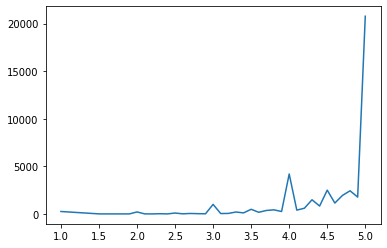

In [35]:
df['avg_rating_of_driver'].value_counts().sort_index().plot()

For simplicity and possibly ignorance sake use the mean of ratings to replace the NaN

In [15]:
# No correlation so we can't do much quickly
df[['avg_rating_of_driver', 'avg_rating_by_driver']].corr()

,avg_rating_of_driver,avg_rating_by_driver
avg_rating_of_driver,1.000000,0.123175
avg_rating_by_driver,0.123175,1.000000


In [38]:
mean_avg_rating_of_driver = df['avg_rating_of_driver'].mean()

In [40]:
mean_avg_rating_by_driver = df['avg_rating_by_driver'].mean()

In [41]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(mean_avg_rating_of_driver)
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(mean_avg_rating_by_driver)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  object        
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  active                  50000 non-null  bool  

### Next one hot encode city and phone

In [45]:
df = df.join(pd.get_dummies(df.city))

In [48]:
df = df.join(pd.get_dummies(df.phone))

In [49]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,Astapor,King's Landing,Winterfell,Android,iPhone
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True,0,1,0,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False,1,0,0,1,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False,1,0,0,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True,0,1,0,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False,0,0,1,1,0


In [50]:
df[(df['Android'] == 0) & (df['iPhone'] == 0)]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,Astapor,King's Landing,Winterfell,Android,iPhone
134,King's Landing,0,2014-01-10,5.000000,1.00,2014-06-11,None,0.0,False,100.0,2.88,5.0,True,0,1,0,0,0
176,Astapor,0,2014-01-28,5.000000,1.00,2014-03-18,None,0.0,False,100.0,20.32,5.0,False,1,0,0,0,0
320,Astapor,1,2014-01-08,5.000000,1.00,2014-01-09,None,0.0,False,100.0,31.01,5.0,False,1,0,0,0,0
349,Winterfell,1,2014-01-06,3.300000,1.00,2014-06-22,None,0.0,True,33.3,6.03,5.0,True,0,0,1,0,0
389,King's Landing,5,2014-01-26,4.900000,1.02,2014-07-01,None,3.0,False,66.7,3.08,4.8,True,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49587,Winterfell,1,2014-01-17,5.000000,1.00,2014-01-19,None,0.0,True,0.0,1.15,3.0,False,0,0,1,0,0
49627,Astapor,6,2014-01-05,5.000000,1.00,2014-01-25,None,0.0,True,33.3,3.10,4.5,False,1,0,0,0,0
49666,Winterfell,2,2014-01-22,4.601559,1.00,2014-01-23,None,0.0,True,100.0,0.73,5.0,False,0,0,1,0,0
49825,Astapor,0,2014-01-25,5.000000,1.00,2014-03-10,None,0.0,True,50.0,5.82,5.0,False,1,0,0,0,0


### Scale the numerical values

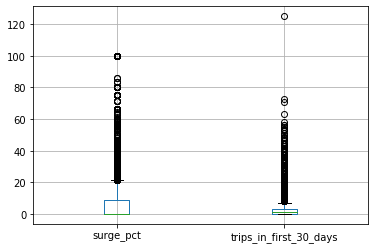

In [63]:
import seaborn as sns
df[['surge_pct', 'trips_in_first_30_days']].boxplot()

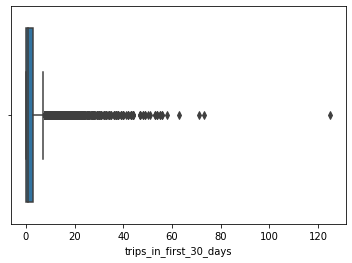

In [67]:
sns.boxplot(x=df['trips_in_first_30_days'])

### Lets find outliers

In [158]:
from scipy import stats

z_trips = np.abs(stats.zscore(df['trips_in_first_30_days']))


In [159]:
outliers = np.where(z_trips > 3)

In [163]:
len(outliers[0])

1082

In [165]:
len(df[df['trips_in_first_30_days'] > 13])

1082

In [166]:
df['trips_in_first_30_days_clipped'] = df['trips_in_first_30_days'].clip(lower=0, upper=13)

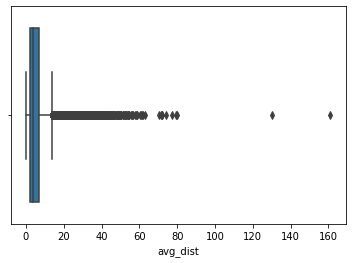

In [168]:
sns.boxplot(x=df['avg_dist'])

In [205]:
len(df[df['avg_dist'] > 20])

1373

In [206]:
df['avg_dist_clipped'] = df['avg_dist'].clip(lower=0, upper=20)

In [167]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,Android,iPhone,trips_in_first_30_days_scaled,avg_rating_of_driver_scaled,avg_surge_scaled,surge_pct_scaled,weekday_pct_scaled,avg_rating_by_driver_scaled,trips_in_first_30_days_clipped
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.330680,0.202600,0.466720,0.300440,0.691640,0.018226,0.900390,0.010681,0.088495,0.609261,0.944540,2.115900
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445753,0.470463,0.401941,0.498896,0.458454,0.461821,0.030341,0.141244,0.031762,0.199588,0.370815,0.111438,2.851503
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.875000,0.000000,0.000000,0.333000,0.925000,0.000000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.008000,0.925000,0.000000,0.000000,0.667000,1.000000,1.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.024000,1.000000,0.007143,0.086000,1.000000,1.000000,3.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000


### Scale numeric variables

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [208]:
mm_scaler = MinMaxScaler()

In [209]:
df['trips_in_first_30_days_scaled'] = mm_scaler.fit_transform(df[['trips_in_first_30_days_clipped']])

In [210]:
df['avg_rating_of_driver_scaled'] = mm_scaler.fit_transform(df[['avg_rating_of_driver']])

In [211]:
df['avg_surge_scaled'] = mm_scaler.fit_transform(df[['avg_surge']])

In [212]:
df['surge_pct_scaled'] = mm_scaler.fit_transform(df[['surge_pct']])

In [213]:
df['weekday_pct_scaled'] = mm_scaler.fit_transform(df[['weekday_pct']])

In [214]:
df['avg_dist_scaled'] = mm_scaler.fit_transform(df[['avg_dist_clipped']])

In [215]:
df['avg_rating_by_driver_scaled'] = mm_scaler.fit_transform(df[['avg_rating_by_driver']])

In [216]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,...,iPhone,trips_in_first_30_days_scaled,avg_rating_of_driver_scaled,avg_surge_scaled,surge_pct_scaled,weekday_pct_scaled,avg_rating_by_driver_scaled,trips_in_first_30_days_clipped,avg_dist_scaled,avg_dist_clipped
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,...,1,0.307692,0.925,0.014286,0.154,0.462,1.000,4,0.1835,3.67
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,...,0,0.000000,1.000,0.000000,0.000,0.500,1.000,0,0.4130,8.26
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,...,1,0.230769,0.825,0.000000,0.000,1.000,1.000,3,0.0385,0.77
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,...,1,0.692308,0.900,0.020000,0.200,0.800,0.975,9,0.1180,2.36
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,...,0,1.000000,0.850,0.027143,0.118,0.824,0.975,13,0.1565,3.13


In [217]:
scaled_columns = [col for col in df.columns if col.endswith("_scaled")]

In [218]:
model_columns = scaled_columns + ['ultimate_black_user', 'Astapor', "King's Landing", "Winterfell", 
                                  "Android", "iPhone", "active"]

In [219]:
df_model = df[model_columns]

In [220]:
df_model.head()

,trips_in_first_30_days_scaled,avg_rating_of_driver_scaled,avg_surge_scaled,surge_pct_scaled,weekday_pct_scaled,avg_rating_by_driver_scaled,avg_dist_scaled,ultimate_black_user,Astapor,King's Landing,Winterfell,Android,iPhone,active
0,0.307692,0.925,0.014286,0.154,0.462,1.000,0.1835,True,0,1,0,0,1,True
1,0.000000,1.000,0.000000,0.000,0.500,1.000,0.4130,False,1,0,0,1,0,False
2,0.230769,0.825,0.000000,0.000,1.000,1.000,0.0385,False,1,0,0,0,1,False
3,0.692308,0.900,0.020000,0.200,0.800,0.975,0.1180,True,0,1,0,0,1,True
4,1.000000,0.850,0.027143,0.118,0.824,0.975,0.1565,False,0,0,1,1,0,False


In [123]:
df_model.iloc[45922]

trips_in_first_30_days_scaled          0
avg_rating_of_driver_scaled      0.90039
avg_surge_scaled                       0
surge_pct_scaled                       0
weekday_pct_scaled                     0
avg_rating_by_driver_scaled            1
ultimate_black_user                False
Astapor                                0
King's Landing                         0
Winterfell                             1
Android                                0
iPhone                                 1
active                             False
Name: 45922, dtype: object

# Model Formation

Classes aren't wonderfully balanced but are close

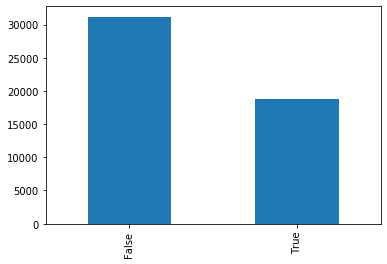

In [221]:
df_model['active'].value_counts().plot(kind="bar")

### Split the data

In [222]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(df_model.iloc[:,:-1], df_model.active, test_size=0.2, 
                                                    stratify=df_model.active, random_state=42)

In [223]:
X_train.head()

,trips_in_first_30_days_scaled,avg_rating_of_driver_scaled,avg_surge_scaled,surge_pct_scaled,weekday_pct_scaled,avg_rating_by_driver_scaled,avg_dist_scaled,ultimate_black_user,Astapor,King's Landing,Winterfell,Android,iPhone
40147,0.000000,0.90039,0.000000,0.000,0.000,1.000,0.5170,True,0,1,0,0,1
45922,0.000000,0.90039,0.000000,0.000,0.000,1.000,0.9205,False,0,0,1,0,1
6707,0.230769,0.70000,0.011429,0.167,0.333,0.925,0.1160,False,0,1,0,0,1
5413,0.230769,1.00000,0.000000,0.000,1.000,1.000,0.2175,False,0,1,0,0,1
6925,0.076923,0.37500,0.000000,0.000,0.929,0.825,0.1425,False,0,0,1,0,1


In [224]:
y_train.head()

40147     True
45922    False
6707     False
5413     False
6925      True
Name: active, dtype: bool

# Linear Regression

In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
lr = LogisticRegression(random_state=42).fit(X_train, y_train)

/Users/omni/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [227]:
lr.score(X_test, y_test)

0.7173

## Hyperparameter tuning

In [181]:
params = {
    'C': [0.1, 0.5, 0.74, 1.0, 5.0],
    #'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [200]:
lr = LogisticRegression(random_state=42)

In [201]:
gs_lr = GridSearchCV(lr, params, n_jobs=3).fit(X_train, y_train)

/Users/omni/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/omni/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [202]:
gs_lr.best_estimator_

LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
gs_lr.score(X_test, y_test)

0.7157

# Random Forest

In [228]:
from sklearn.ensemble import RandomForestClassifier

In [229]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, y_train)

/Users/omni/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [231]:
# generally  better
rf.score(X_test, y_test)

0.7526

## Tune hyperparameters

In [232]:
params = {"n_estimators": [100, 500, 1000, 1500],
          "max_depth": [2, 4, 6, 8], 
          "criterion": ["gini", "entropy"],
          "max_features": ["sqrt", "log2"],
          "class_weight": ["balanced", "balanced_subsample", None]}

In [236]:
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), params).fit(X_train, y_train)

/Users/omni/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [237]:
gs_rf.score(X_test, y_test)

0.7831

In [240]:
y_pred = gs_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.87      0.83      6239
        True       0.75      0.63      0.69      3761

    accuracy                           0.78     10000
   macro avg       0.77      0.75      0.76     10000
weighted avg       0.78      0.78      0.78     10000



In [241]:
gs_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [248]:
rf.feature_importances_

array([0.07817099, 0.08210802, 0.06383065, 0.07619462, 0.13138971,
       0.12335178, 0.29417302, 0.03339272, 0.01804342, 0.04834997,
       0.01047747, 0.017145  , 0.02337263])

In [249]:
{f:v for f, v in zip(X_train.columns[:-1], rf.feature_importances_)}

{'trips_in_first_30_days_scaled': 0.07817099364692384,
 'avg_rating_of_driver_scaled': 0.08210801593507874,
 'avg_surge_scaled': 0.06383064952028839,
 'surge_pct_scaled': 0.07619461502665875,
 'weekday_pct_scaled': 0.13138970855539117,
 'avg_rating_by_driver_scaled': 0.12335177913283205,
 'avg_dist_scaled': 0.2941730237740228,
 'ultimate_black_user': 0.03339272087354593,
 'Astapor': 0.018043424959253283,
 "King's Landing": 0.048349974747229144,
 'Winterfell': 0.010477465688754779,
 'Android': 0.01714499677125169}

# Finally XGBoost

In [242]:
import xgboost as xgb

In [243]:
boost = xgb.XGBClassifier(random_state=42).fit(X_train, y_train)

In [359]:
boost = xgb.XGBClassifier(learning_rate=0.1, 
                          n_estimators=5000, 
                          objective= 'binary:logistic',
                          nthread=-1,
                          scale_pos_weight=1,
                          random_seed=42,
                           max_depth=3,
                           min_child_weight=5,
                           gamma=0,
                           subsample=0.85,
                           colsample_bytree=0.55,
                           reg_alpha=1).fit(X_train, y_train)

In [360]:
y_pred = boost.predict(X_test)

In [361]:
boost.score(X_test, y_test)

0.7892

In [362]:
{f:v for f, v in zip(X_train.columns, boost.feature_importances_)}

{'trips_in_first_30_days_scaled': 0.037295353,
 'avg_rating_of_driver_scaled': 0.02016966,
 'avg_surge_scaled': 0.024819495,
 'surge_pct_scaled': 0.054295562,
 'weekday_pct_scaled': 0.052900374,
 'avg_rating_by_driver_scaled': 0.08186487,
 'avg_dist_scaled': 0.019813396,
 'ultimate_black_user': 0.113420285,
 'Astapor': 0.071847156,
 "King's Landing": 0.28531814,
 'Winterfell': 0.02387506,
 'Android': 0.1361367,
 'iPhone': 0.07824395}

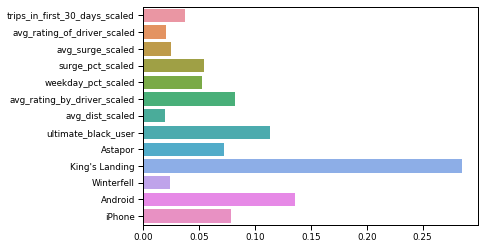

In [363]:
chart = sns.barplot(y=X_train.columns, x=boost.feature_importances_, orient='h')

## Tune hyperparameters

In [352]:
parameters = {
      
     }

In [353]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.1, 
                          n_estimators=1000, 
                          objective= 'binary:logistic',
                          nthread=4,
                          scale_pos_weight=1,
                          random_seed=42,
                           max_depth=3,
                           min_child_weight=5,
                           gamma=0,
                           subsample=0.85,
                           colsample_bytree=0.55,
                           reg_alpha=1)

In [354]:
tuned = GridSearchCV(xgb_clf, parameters, scoring='roc_auc', cv=5).fit(X_train, y_train)

In [355]:
y_pred = tuned.predict(X_test)

In [356]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.87      0.84      6239
        True       0.75      0.67      0.71      3761

    accuracy                           0.79     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.79      0.79      0.79     10000



In [357]:
tuned.score(X_test, y_test)

0.8599930560051043

In [358]:
tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.55, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_seed=42,
              random_state=0, reg_alpha=1, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.85, verbosity=1)